## Accessing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'C:\Users\Hp\Downloads\Competition_Data.csv')

In [3]:
df.isnull().sum()

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64

In [4]:
df.describe(include=[np.number])


,Index,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,167.017783,399.611320,4771.147859,11396.865217,174.280887
std,28867.657797,69.503418,59.440567,1524.737540,2091.246764,71.545584
min,0.000000,47.700000,285.000000,2003.700000,7613.560000,47.950000
25%,24999.750000,105.410000,348.000000,3481.460000,9551.590000,118.627500
50%,49999.500000,159.420000,401.000000,4746.530000,11240.020000,162.510000
75%,74999.250000,221.900000,451.000000,6045.477500,13175.230000,237.335000
max,99999.000000,310.660000,522.000000,7853.810000,15685.080000,313.640000


In [5]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [6]:
#Let’s have a look at the column info before moving forward
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


## Comparing the price distribution with the competition:

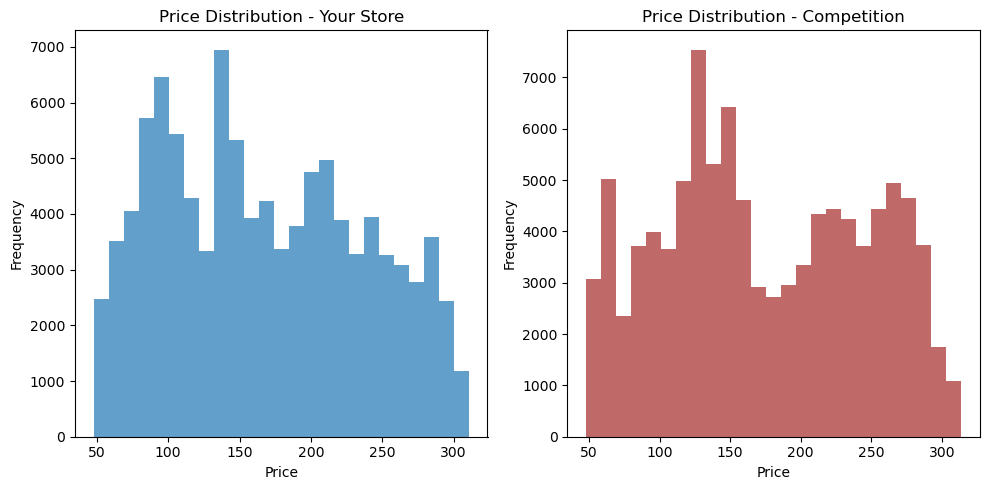

In [8]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df['Price'],bins=25,alpha=0.7,label='Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')


plt.subplot(1,2,2)
plt.hist(df['Competition_Price'],bins=25,alpha=0.7,color='brown',label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

`It shows that the competition’s prices are generally higher, with peaks around the 100-150 and 200-250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store’s prices are more evenly distributed across the 50-300 range, with notable peaks around 100-150.`

## Compare the relationship between price and sales:

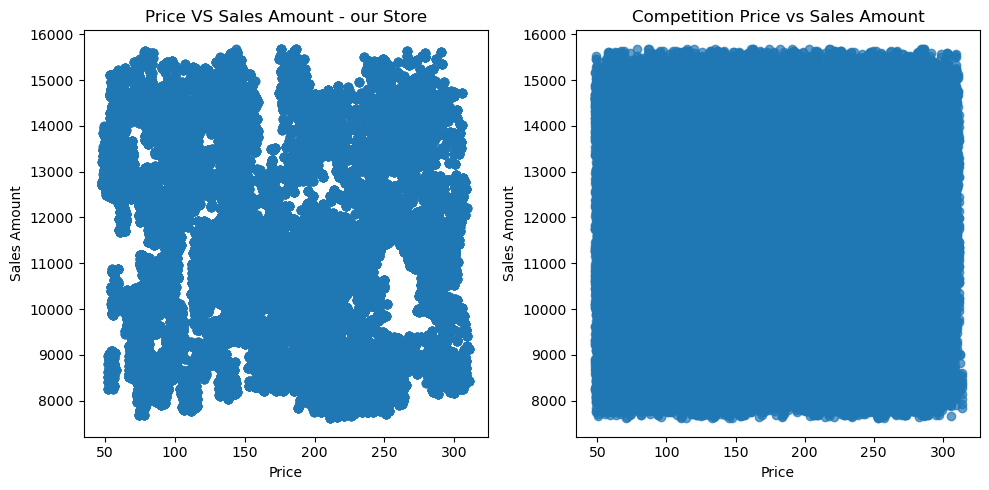

In [11]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df['Price'],df['Sales_Amount'],alpha=0.7,label='Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price VS Sales Amount - our Store')


plt.subplot(1,2,2)
plt.scatter(df['Competition_Price'],df['Sales_Amount'],alpha=0.7,label='Competition')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.tight_layout()
plt.show()

`For our store, the plot shows a wide dispersion of sales amounts across various price points, which indicates varied performance in different price ranges without a clear trend. In contrast, the competition’s plot shows a dense clustering of sales amounts around higher values, with prices also spread across a similar range but demonstrating a more consistent sales performance. It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.`

## Compare the price changes over time:

In [14]:
df['Fiscal_Week_ID'] = pd.to_datetime(df['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

In [15]:
df['Fiscal_Week_ID']

0       2019-03-18
1       2019-03-18
2       2019-03-18
3       2019-03-18
4       2019-03-18
           ...    
99995   2019-04-15
99996   2019-04-15
99997   2019-04-15
99998   2019-04-15
99999   2019-04-15
Name: Fiscal_Week_ID, Length: 100000, dtype: datetime64[ns]

In [16]:
weekly_prices = df.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()
weekly_prices

,Fiscal_Week_ID,Price,Competition_Price
0,2019-03-18,166.352333,175.018236
1,2019-03-25,166.486184,173.169854
2,2019-04-01,169.865254,173.161543
3,2019-04-08,164.892479,174.914615
4,2019-04-15,167.455556,175.189035


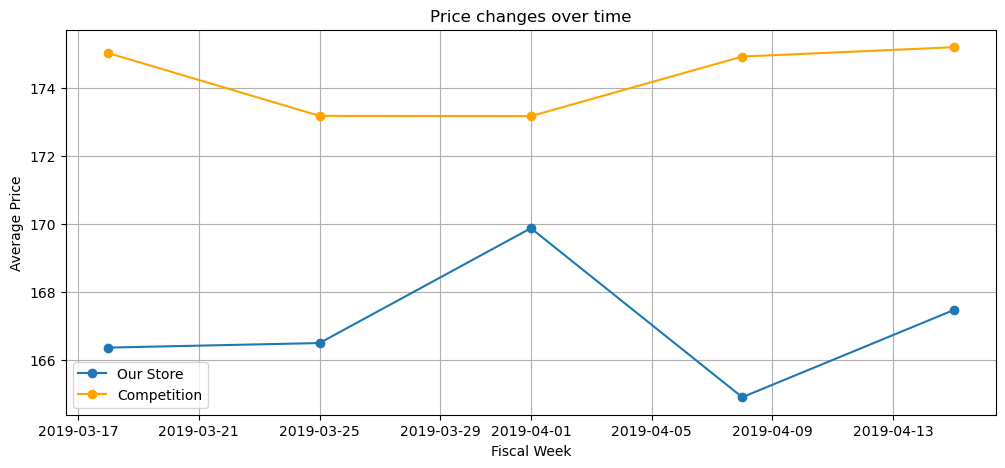

In [17]:
plt.figure(figsize=(12,5))
plt.plot(weekly_prices['Fiscal_Week_ID'],weekly_prices['Price'],label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'],weekly_prices['Competition_Price'],label='Competition', marker='o',color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price changes over time')
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()

`The competition maintains higher average prices consistently above 170, with a slight upward trend over the observed weeks. In contrast, our store’s prices start around 166, increase slightly, then dip before rising again. It indicates that the competition follows a more stable pricing strategy, while our store experiences more fluctuations in pricing. The stability in the competition’s pricing could be contributing to their higher and more consistent sales performance.`

## How changes in prices affect the change in quantity sold

- calculate price elasticity:


- Ed = % change in quantity demanded / % change in price

In [27]:
df['change_in_price']=df['Price'].pct_change()

In [28]:
df['change_in_quantity']=df['Item_Quantity'].pct_change()

In [29]:
df['price_elasticity']=df['change_in_quantity']/df['change_in_price']

In [31]:
df['price_elasticity']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
99995    0.693748
99996         NaN
99997         NaN
99998         NaN
99999         NaN
Name: price_elasticity, Length: 100000, dtype: float64

In [32]:
df[df == float('inf')] = None
df[df == -float('inf')] = None
#handle infinite values in a simpler way

In [33]:
df.dropna(subset=['price_elasticity'], inplace=True)

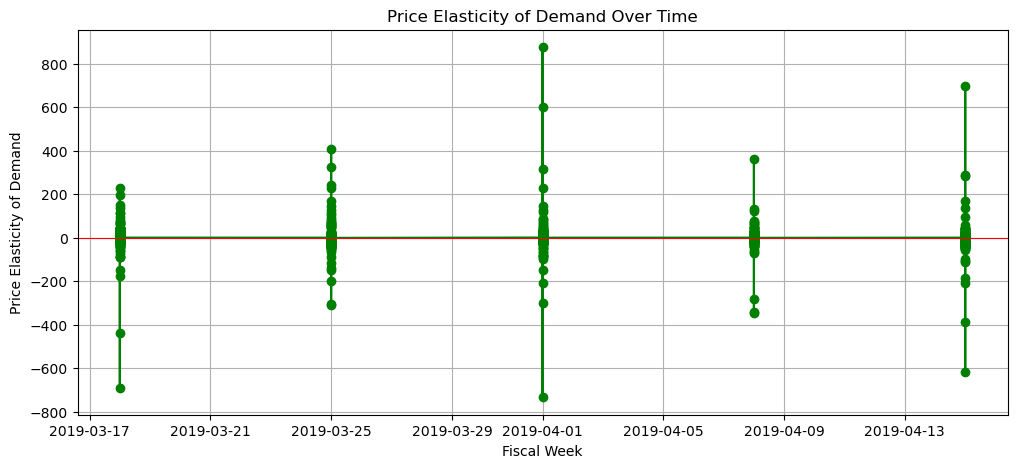

In [34]:
plt.figure(figsize=(12,5))
plt.plot(df['Fiscal_Week_ID'], df['price_elasticity'],marker='o',color='green')
plt.axhline(0, color='red', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

`

1. **Variability in Elasticity**:
   - Price elasticity of demand changes significantly from week to week.

2. **Positive Elasticity**:
   - In some weeks, demand increases with price increases (high positive elasticity).

3. **Negative Elasticity**:
   - In other weeks, demand drops sharply with price increases (high negative elasticity).

4. **Inconsistent Demand Response**:
   - The wide range of elasticity values suggests that demand doesn't respond to price consistently.

5. **Other Influencing Factors**:
   - Factors like promotions, seasonality, or market conditions might also be impacting demand.`

## Compare the total sales amounts for our store and the competition:

In [41]:
total_sales_your_store = df['Sales_Amount'].sum()
total_sales_competition = (df['Competition_Price'] * df['Item_Quantity']).sum()

total_qty_your_store = df['Item_Quantity'].sum()
total_qty_competition = df['Item_Quantity'].sum()  

In [43]:
summary=pd.DataFrame({
    "Calculation metrics": ['Total Sales Amount','Total Quantity Sold'],
    'Our Store': [total_sales_your_store, total_qty_your_store],
    'Competition':[total_sales_competition, total_qty_competition]
})

In [49]:
summary

,Calculation metrics,Our Store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


### Key Observations:
1. **Sales Gap**:
   - Although both stores sold the **same quantity of products**, the competition generated a much higher **total sales amount**.
   - This suggests that the competitor's products might have **higher average prices** or focus on premium products.

2. **Performance Insights**:
   - Your store's pricing strategy, product mix, or customer base might differ significantly from the competition, leading to the sales revenue disparity.

## Where the competition outperforms our store:

In [56]:
#define price brackets

In [58]:
bins=[0,50,100,150,200,250,300,350,400,450,500]
labels=['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

In [61]:
# create price brackets for both your store and competition

In [63]:
df['price_bracket'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)
df['competition_price_bracket'] = pd.cut(df['Competition_Price'], bins=bins, labels=labels, right=False)


In [65]:
df['price_bracket']

10       101-150
20       101-150
30       101-150
40       101-150
50       101-150
          ...   
99975     51-100
99980     51-100
99985     51-100
99990    101-150
99995     51-100
Name: price_bracket, Length: 9991, dtype: category
Categories (10, object): ['0-50' < '51-100' < '101-150' < '151-200' ... '301-350' < '351-400' < '401-450' < '451-500']

In [67]:
sales_by_bracket_your_store=df.groupby('price_bracket', observed=False)['Sales_Amount'].sum().reset_index()


In [69]:
sales_by_bracket_your_store.columns=['Price Bracket','Your Store Sales Amount']

In [71]:
sales_by_bracket_your_store.columns

Index(['Price Bracket', 'Your Store Sales Amount'], dtype='object')

In [73]:
# calculate sales amount by price bracket for competition
df['Competition_sales']=df['Competition_Price']*df['Item_Quantity']
sales_by_bracket_competition = df.groupby('competition_price_bracket',observed=False)['Competition_sales'].sum().reset_index()

In [75]:
sales_by_bracket_competition.columns=['Price Bracket','Competition Sales Amount']

In [77]:
sales_by_bracket_competition.columns

Index(['Price Bracket', 'Competition Sales Amount'], dtype='object')

In [79]:
sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


### Price Bracket Insights:

- **0-50 Bracket**: 
  - The competition has significantly higher sales in this bracket.

- **51-100 Bracket**: 
  - The competition outperforms our store by a wide margin.

- **101-150 Bracket**: 
  - The competition’s sales are much higher than our store’s sales.

- **151-200 Bracket**: 
  - The competition again has significantly higher sales.

- **201-250 Bracket**: 
  - The competition’s sales are nearly double those of our store.

- **251-300 Bracket**: 
  - The competition has higher sales, but the gap is smaller compared to other brackets.

- **301-350 Bracket**: 
  - The competition has higher sales, though the overall sales amount is lower in this bracket compared to others.
thers.

## Price Optimization with Dynamic Pricing

`Now, let’s start by defining a dynamic pricing model and simulating its performance. Here are the steps we will use:

We will enhance our dataset to include segments and calculate price elasticity for each segment.
We’ll create segments based on purchasing behaviour and calculate price elasticity for each segment.
We’ll define dynamic pricing rules based on competitor pricing, demand, and elasticity.
We’ll simulate the dynamic pricing model and compare it with the existing pricing strategy.
Now, let’s start with segmenting the data and calculating price elasticity for each segment:`stomer behavior and market conditions.
gment:

In [84]:
# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary = df.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
df = pd.merge(df, item_summary, on='Item_ID', suffixes=('', '_avg'))

In [86]:
df['segment'] = pd.cut(df['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])


In [88]:
# calculate price elasticity for each segment
segments = df['segment'].unique()
elasticity_data = []

In [90]:
segments

['Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [92]:
for segment in segments:
    # Filter the data for the segment
    segment_data = df[df['segment'] == segment].copy()  # Explicitly make a copy to avoid SettingWithCopyWarning
    
    # Calculate percentage changes and elasticity
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    

In [94]:
segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

In [96]:
avg_elasticity = segment_data['elasticity'].mean()

In [98]:
elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

In [100]:
elasticity_data

[{'segment': 'High', 'avg_elasticity': 0.14804315010292812}]

In [102]:
elasticity_df = pd.DataFrame(elasticity_data)

In [104]:
elasticity_df

,segment,avg_elasticity
0,High,0.148043


`Based on the elasticity, we can define the following dynamic pricing rules:`

`Medium Segment (Inelastic Demand): Small changes in price won’t significantly affect demand. We can slightly increase prices to maximize revenue without losing much in sales volume.
High Segment (Elastic Demand): Demand is sensitive to price changes. We should optimize prices to find the sweet spot that maximizes revenue without losing sales volume.`

## Dynamic Pricing

In [108]:
# create a copy of the dataset for simulation
dynamic_pricing_data = df.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = df['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = df['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


`The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue.`